In [87]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [88]:
# 清理文本的函數
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # 移除 URL
    text = re.sub(r"@\w+", "", text)    # 移除提及
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # 移除非字母字符
    text = text.lower().strip()  # 小寫化並去除多餘空格
    return text


In [89]:
# 使用 VADER 進行情感分析
def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "POSITIVE"
    elif score['compound'] <= -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"


In [90]:
# 讀取 CSV 文件
file_path = './src/top_election_posts_2024.csv'
data = pd.read_csv(file_path, encoding='latin1')


# 清理文本
data = data.dropna(subset=['text'])
data['cleaned_text'] = data['text'].apply(clean_text)
data = data[data['cleaned_text'].str.strip().str.len() > 5]


In [91]:
# 初始化 VADER 分析器
analyzer = SentimentIntensityAnalyzer()

# 添加情感分析列
data['sentiment'] = data['cleaned_text'].apply(analyze_sentiment_vader)


In [92]:
# 計算情感分佈
sentiment_counts = data['sentiment'].value_counts(normalize=True)
print("Sentiment Distribution:")
print(sentiment_counts)

# 如果想要在 Jupyter 中展示數據框
data.head()


Sentiment Distribution:
sentiment
POSITIVE    0.589663
NEGATIVE    0.349256
NEUTRAL     0.061081
Name: proportion, dtype: float64


,subreddit,id,title,text,author,created_at,upvotes,num_comments,url,permalink,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,cleaned_text,sentiment
0,PoliticalDiscussion,1gksts4,Why did Kamala Harris lose the election?,Pennsylvania has just been called. This was th...,hearsdemons,2024/11/6 15:17,2106,4815,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pennsylvania has just been called this was the...,POSITIVE
1,PoliticalDiscussion,1ef5frf,Harris's campaign has a different campaign str...,It seems like Harris has given up on trying to...,No-Touch-2570,2024/7/30 01:30,1839,1009,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it seems like harris has given up on trying to...,POSITIVE
4,PoliticalDiscussion,1gi79lt,Republican Senate leader Mitch McConnell ackno...,Link to his words on it: * https://x.com/harri...,Spiderwig144,2024/11/3 05:44,1524,306,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,link to his words on it and heres a link to ...,NEGATIVE
5,PoliticalDiscussion,18mg5pb,The Colorado Supreme Court on Tuesday said Don...,Colorado Supreme Court rules Trump disqualifie...,jojlo,2023/12/20 07:45,1492,1294,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,colorado supreme court rules trump disqualifie...,POSITIVE
6,PoliticalDiscussion,1bkq6ra,"With Lara Trump now running the RNC, rules wer...","With Lara Trump in place by her Father, rules ...",Deleted,2024/3/22 11:48,1382,407,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,with lara trump in place by her father rules h...,POSITIVE


## 情感分析可視化 ##
**分析**
- POSITIVE    0.61
- NEGATIVE    0.34
- NEUTRAL     0.04
- 貼文大多愛恨分明，正面居多，目前面臨的問題是一篇貼文內可能包含多位候選人的名字，要進行關鍵字分類和情感分析的話，精準度可能待加強。

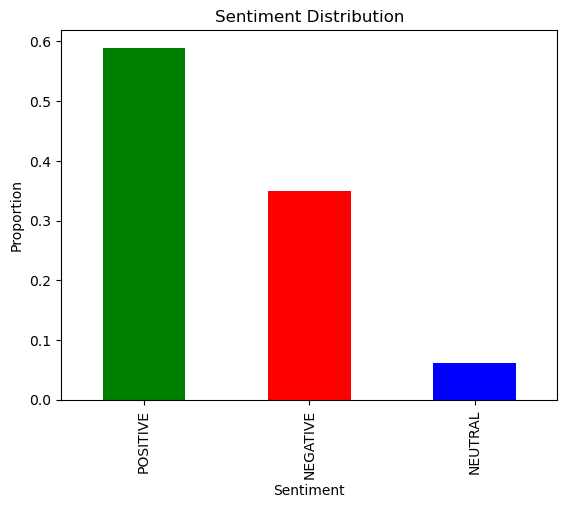

In [93]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()


## 進行關鍵字分析 ##

In [94]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# 定義停用詞
stop_words = set(stopwords.words('english'))
custom_stop_words = ['think', 'just', 'people', 'would']
stop_words.update(custom_stop_words)  # 合併停用詞

# 清理文本並移除停用詞
def clean_text_for_keywords(text):
    tokens = word_tokenize(text.lower())  # 分詞並轉小寫
    tokens = [word for word in tokens if word.isalpha()]  # 保留字母
    tokens = [word for word in tokens if word not in stop_words]  # 移除停用詞
    return tokens

# 對清理後的文本應用該函數
data['keywords'] = data['cleaned_text'].apply(clean_text_for_keywords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maurice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maurice\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
from collections import Counter 

# 展平成單個關鍵詞列表
all_keywords = [keyword for keywords_list in data['keywords'] for keyword in keywords_list]

# 統計詞頻
word_freq = Counter(all_keywords)

# 提取前 20 個熱門關鍵詞
top_keywords = word_freq.most_common(20)

print("Top Keywords:")
print(top_keywords)

Top Keywords:
[('trump', 1572), ('election', 622), ('biden', 554), ('like', 542), ('harris', 469), ('vote', 443), ('states', 383), ('even', 383), ('one', 379), ('president', 374), ('us', 364), ('could', 364), ('party', 342), ('republicans', 321), ('voters', 319), ('republican', 319), ('state', 313), ('im', 295), ('also', 286), ('democrats', 284)]


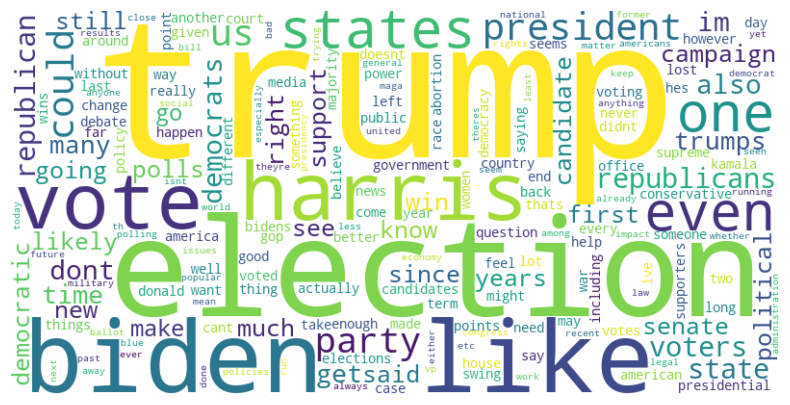

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 生成詞雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 顯示詞雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 關鍵字分析結果 ###
- 以上為詞雲分析的結果，關鍵字不外乎就是兩位總統候選人的名字，還有Biden，如果要進行關鍵字分類可以此為基礎。

## 進行貼文主要議題分析 ## 

In [105]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 將分詞結果轉換回字符串
data['cleaned_text_str'] = data['cleaned_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# 檢查 cleaned_text 欄位的類型
print(data['cleaned_text_str'].head())
print(data['cleaned_text_str'].apply(type).value_counts())

# 使用 TF-IDF 向量化
stop_words = set(stopwords.words('english'))
custom_stop_words = [ 'trump', 'biden', 'election', 'like', 'people', 
    'harris', 'think', 'vote', 'just', 'president',
    'party', 'states', 'im', 'republicans', 'republican',
    'dont', 'voters', 'democrats', 'know', 'candidate', 'goodbye', 'everyone',
    'does', 'going', 'trumps', 'would' ,'could', 'one', 'even', 'us', 
    'get', 'time', 'state', 'many', 'win', 'campaign', 'democratic', 
    'much', 'also', 'still', 'since', 'political', 'polls', 
    'years', 'senate', 'debate', 'said', 'see', 
    'right', 'likely', 'go', 'kamala', 'new', 'make']
stop_words.update(custom_stop_words)  # 合併停用詞

# 將停用詞集合轉換為列表
stop_words_list = list(stop_words)

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words= stop_words_list)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text_str'])


# 查看特徵名稱
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Feature names:", feature_names[:10])  # 顯示前10個特徵詞


0    pennsylvania has just been called this was the...
1    it seems like harris has given up on trying to...
4    link to his words on it   and heres a link to ...
5    colorado supreme court rules trump disqualifie...
6    with lara trump in place by her father rules h...
Name: cleaned_text_str, dtype: object
cleaned_text_str
<class 'str'>    1277
Name: count, dtype: int64
Feature names: ['abandon' 'abandoned' 'abandoning' 'abc' 'abetting' 'ability' 'able'
 'abolishing' 'abortion' 'abortions']


In [106]:
from sklearn.decomposition import LatentDirichletAllocation

# 設置主題數量
n_topics = 6
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# 顯示每個主題的關鍵詞，明天來修一下這個部分
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# 查看每個主題的前10個關鍵詞
display_topics(lda_model, feature_names, 10)


Topic 0:
walkmiles signs unemployed tariff funny maduro depth badly venezuela discussing
Topic 1:
claiming freedom everyones reading th version capitol forget listen winner
Topic 2:
support presidential actually say lot court first seems voting things
Topic 3:
topic counts interesting moments excellent classified judge newsworthy eating planning
Topic 4:
taxes musks tired waiting dad bowman millions capital learned lara
Topic 5:
comeback johnson checked listen lies truth populated sub waltz greene


In [107]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from pyLDAvis import display

# 使用 pyLDAvis 構建可視化
lda_vis = pyLDAvis.prepare(
    topic_term_dists=lda_model.components_,
    doc_topic_dists=lda_model.transform(tfidf_matrix),
    doc_lengths=[len(doc) for doc in data['cleaned_text']],
    vocab=tfidf_vectorizer.get_feature_names_out(),
    term_frequency=tfidf_matrix.sum(axis=0).A1
)

# 顯示可視化
pyLDAvis.display(lda_vis)



In [103]:
# 為每篇貼文分配主題
data['topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

# 檢查主題分布
topic_counts = data['topic'].value_counts()
print("Topic distribution:")
print(topic_counts)


Topic distribution:
topic
1    1240
0      13
2      10
5       6
3       5
4       3
Name: count, dtype: int64


In [104]:
# 分組計算每個主題的情感分布
topic_sentiment = data.groupby('topic')['sentiment'].value_counts(normalize=True).unstack()
print("Sentiment distribution by topic:")
print(topic_sentiment)


Sentiment distribution by topic:
sentiment  NEGATIVE   NEUTRAL  POSITIVE
topic                                  
0          0.076923  0.538462  0.384615
1          0.351613  0.049194  0.599194
2          0.400000  0.300000  0.300000
3          0.400000  0.400000  0.200000
4          0.666667       NaN  0.333333
5          0.166667  0.833333       NaN


## 進行時間序列性分析 ##

In [ ]:
import pandas as pd

# 確保日期轉換的格式正確
try:
    data['created_at'] = pd.to_datetime(data['created_at'], format='%Y/%m/%d %H:%M', errors='coerce')
except Exception as e:
    print(f"Error during datetime conversion: {e}")

# 檢查無效日期並過濾
invalid_dates = data[data['created_at'].isna()]
if not invalid_dates.empty:
    print("Found invalid dates:")
    print(invalid_dates.head())
data = data.dropna(subset=['created_at'])

# 確認過濾後數據的基本信息
print(f"Filtered data: {len(data)} rows")

# 確保按周分組的格式
try:
    data['week'] = data['created_at'].dt.to_period('W').astype(str)
except Exception as e:
    print(f"Error during week grouping: {e}")

# 查看分組後的基本分布
print(data['week'].value_counts().head())



Found invalid dates:
               subreddit       id  \
33   PoliticalDiscussion  1bdqmio   
349  PoliticalDiscussion  1gsuqox   
506  PoliticalDiscussion  18clymq   
586  PoliticalDiscussion  1d2qu5y   
692  PoliticalDiscussion  1fxxxrg   

                                                 title  \
33   ?Too many Republican leaders are lying to Ame...   
349  According to the democracy index, the United S...   
506  What do you think the Republicans have done in...   
586  How successful would DeSantis??presidential ca...   
692  How do you foresee the Supreme Court being sha...   

                                                  text  \
33    but to my knowledge Buck is the first to volu...   
349  https://www.democracymatrix.com/ranking I incl...   
506  The Republican Party took a majority in the Ho...   
586   DeSantis was polling around 30% among the Rep...   
692  The obvious x-factor in all this being which p...   

                                                author cre

In [82]:
# 計算每週的情感分布
sentiment_over_time_weekly = data.groupby('week')['sentiment'].value_counts(normalize=True).unstack()

# 填充缺失值
sentiment_over_time_weekly = sentiment_over_time_weekly.fillna(0)

# 查看結果
print(sentiment_over_time_weekly.head())


sentiment              NEGATIVE   NEUTRAL  POSITIVE
week                                               
2023-11-27/2023-12-03  0.000000  0.000000  1.000000
2023-12-04/2023-12-10  0.200000  0.000000  0.800000
2023-12-11/2023-12-17  0.571429  0.000000  0.428571
2023-12-18/2023-12-24  0.357143  0.000000  0.642857
2023-12-25/2023-12-31  0.214286  0.071429  0.714286


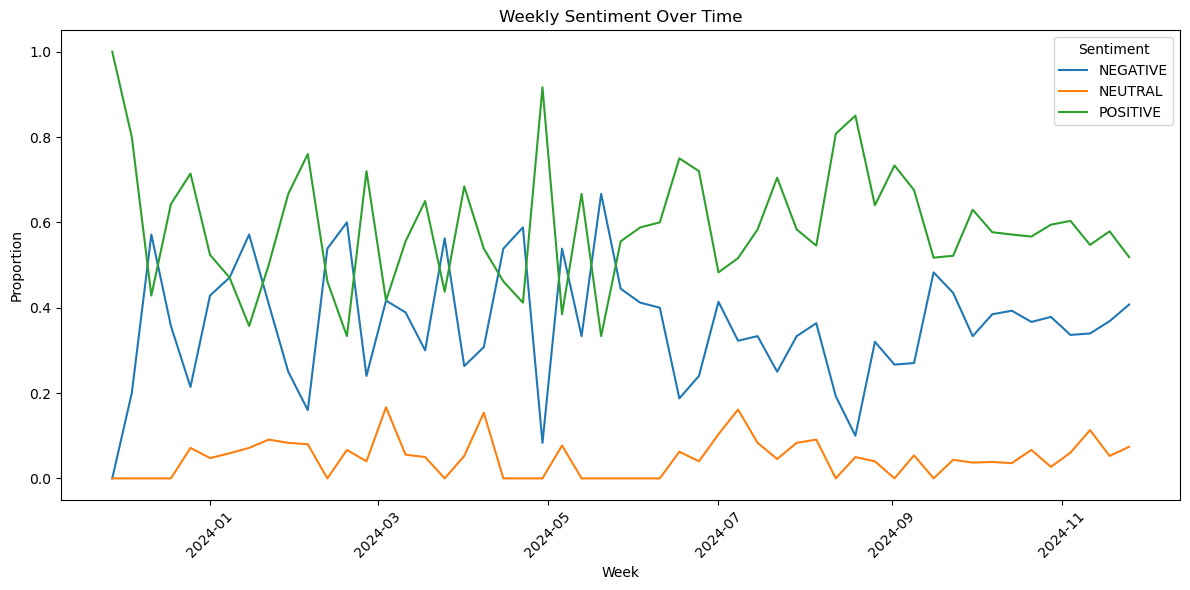

In [83]:
import matplotlib.pyplot as plt

# 提取範圍的開始日期
sentiment_over_time_weekly.index = sentiment_over_time_weekly.index.str.split('/').str[0]

# 將其轉換為標準日期格式
sentiment_over_time_weekly.index = pd.to_datetime(sentiment_over_time_weekly.index, errors='coerce')

plt.figure(figsize=(12, 6))
for sentiment in sentiment_over_time_weekly.columns:
    plt.plot(sentiment_over_time_weekly.index, sentiment_over_time_weekly[sentiment], label=sentiment)

plt.title('Weekly Sentiment Over Time')
plt.xlabel('Week')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


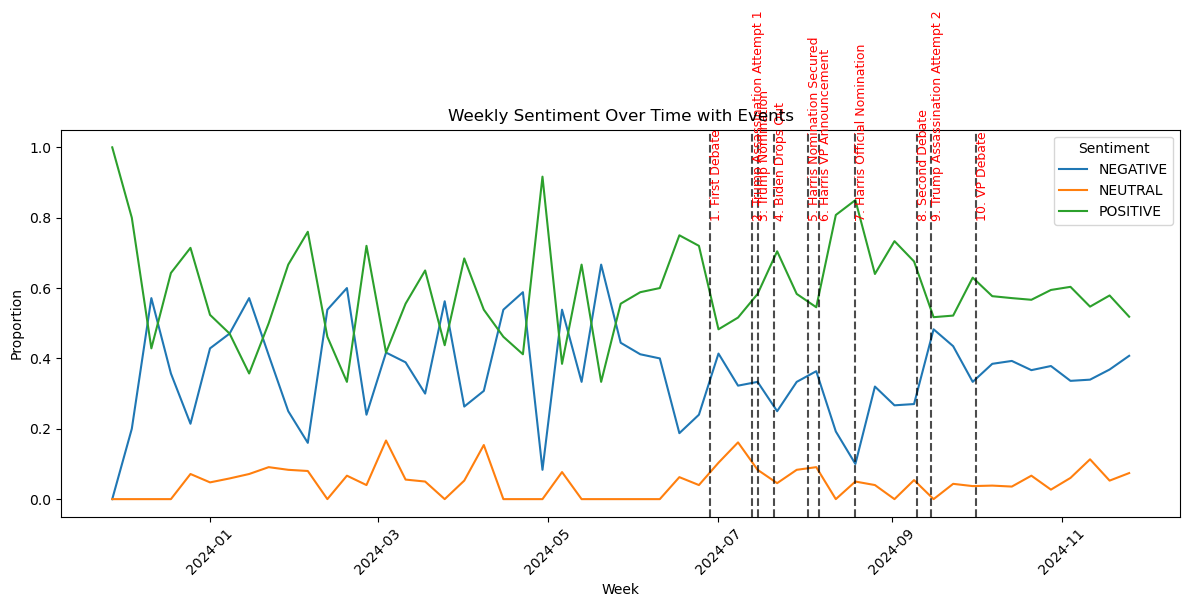

In [84]:
# 事件列表
events = {
    "1. First Debate": "2024-06-28",
    "2. Trump Assassination Attempt 1": "2024-07-13",
    "3. Trump Nomination": "2024-07-15",
    "4. Biden Drops Out": "2024-07-21",
    "5. Harris Nomination Secured": "2024-08-02",
    "6. Harris VP Announcement": "2024-08-06",
    "7. Harris Official Nomination": "2024-08-19",
    "8. Second Debate": "2024-09-10",
    "9. Trump Assassination Attempt 2": "2024-09-15",
    "10. VP Debate": "2024-10-01"
}

# 繪製情感趨勢圖
plt.figure(figsize=(12, 6))
for sentiment in sentiment_over_time_weekly.columns:
    plt.plot(sentiment_over_time_weekly.index, sentiment_over_time_weekly[sentiment], label=sentiment)

# 標記事件
for event_name, event_date in events.items():
    event_date = pd.to_datetime(event_date)
    plt.axvline(event_date, color='black', linestyle='--', alpha=0.7)  # 添加垂直線
    plt.text(event_date, 0.8, event_name, rotation=90, fontsize=9, color='red')  # 添加事件標籤

# 添加圖表標題和圖例
plt.title('Weekly Sentiment Over Time with Events')
plt.xlabel('Week')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 定義事件影響範圍（例如 7 天前後）
time_window = pd.Timedelta(days=7)

# 存儲事件前後情感比例
event_impact = {}

for event_name, event_date in events.items():
    event_date = pd.to_datetime(event_date)
    pre_event = sentiment_over_time_weekly.loc[event_date - time_window:event_date]
    post_event = sentiment_over_time_weekly.loc[event_date:event_date + time_window]
    
    # 計算平均情感分布
    event_impact[event_name] = {
        "pre_event": pre_event.mean(),
        "post_event": post_event.mean()
    }

# 查看每個事件前後的情感變化
for event, impact in event_impact.items():
    print(f"Event: {event}")
    print("Pre-event sentiment:", impact["pre_event"])
    print("Post-event sentiment:", impact["post_event"])
    print()


Event: 1. First Debate
Pre-event sentiment: sentiment
NEGATIVE    0.24
NEUTRAL     0.04
POSITIVE    0.72
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.413793
NEUTRAL     0.103448
POSITIVE    0.482759
dtype: float64

Event: 2. Trump Assassination Attempt 1
Pre-event sentiment: sentiment
NEGATIVE    0.322581
NEUTRAL     0.161290
POSITIVE    0.516129
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.333333
NEUTRAL     0.083333
POSITIVE    0.583333
dtype: float64

Event: 3. Trump Nomination
Pre-event sentiment: sentiment
NEGATIVE    0.327957
NEUTRAL     0.122312
POSITIVE    0.549731
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.291667
NEUTRAL     0.064394
POSITIVE    0.643939
dtype: float64

Event: 4. Biden Drops Out
Pre-event sentiment: sentiment
NEGATIVE    0.333333
NEUTRAL     0.083333
POSITIVE    0.583333
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.250000
NEUTRAL     0.045455
POSITIVE    0.704545
dtype: float64

Event: 5. Harris

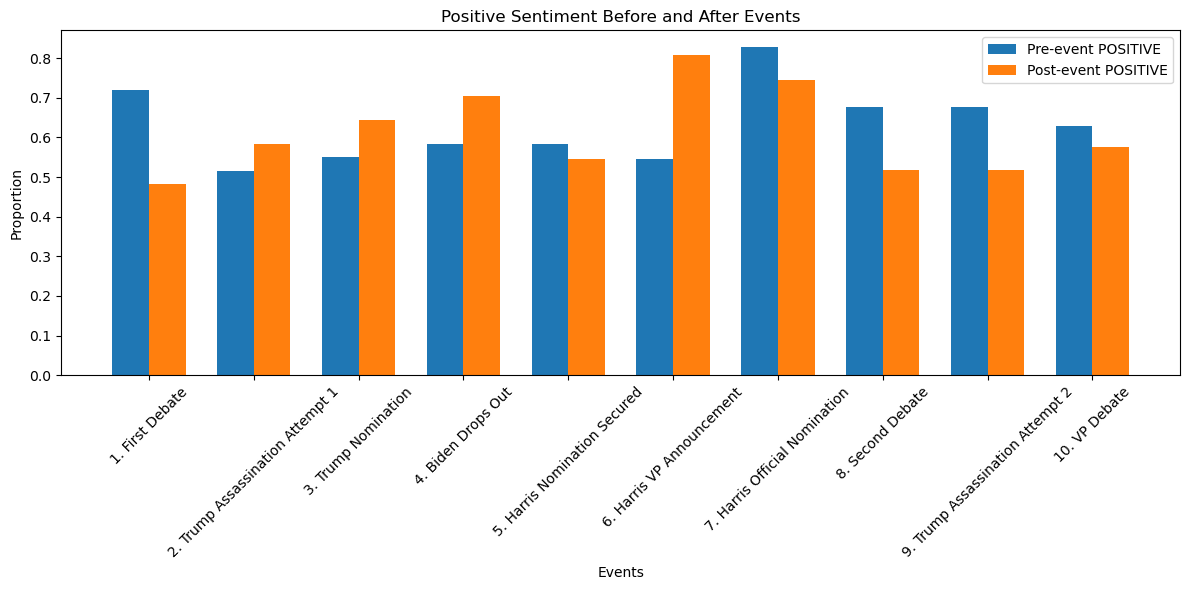

In [86]:
import numpy as np

# 構建條形圖數據
labels = list(event_impact.keys())
pre_event = [impact["pre_event"]["POSITIVE"] for impact in event_impact.values()]
post_event = [impact["post_event"]["POSITIVE"] for impact in event_impact.values()]

# 繪製條形圖
x = np.arange(len(labels))  # 事件索引
width = 0.35  # 條形寬度

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, pre_event, width, label='Pre-event POSITIVE')
ax.bar(x + width/2, post_event, width, label='Post-event POSITIVE')

# 添加標籤和圖例
ax.set_xlabel('Events')
ax.set_ylabel('Proportion')
ax.set_title('Positive Sentiment Before and After Events')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


## Reddit立場情感分析　

In [108]:
# 定義關鍵詞列表
democrat_keywords = ['biden', 'democrats', 'liberal', 'progressive']
republican_keywords = ['trump', 'republicans', 'conservative', 'right-wing']

def determine_party(text):
    democrat_score = sum(text.lower().count(word) for word in democrat_keywords)
    republican_score = sum(text.lower().count(word) for word in republican_keywords)
    if democrat_score > republican_score:
        return 'democrats'
    elif republican_score > democrat_score:
        return 'republicans'
    else:
        return 'neutral'

data['primary_party'] = data['cleaned_text'].apply(determine_party)


In [109]:
primary_party_sentiment = data.groupby('primary_party')['sentiment'].value_counts(normalize=True).unstack()
print("Sentiment distribution by primary_party:")
print(primary_party_sentiment)

Sentiment distribution by topic:
sentiment      NEGATIVE   NEUTRAL  POSITIVE
primary_party                              
democrats      0.292237  0.018265  0.689498
neutral        0.329923  0.107417  0.562660
republicans    0.379310  0.047976  0.572714


In [113]:
# 統計每個主題的分類數量
total_texts = len(data['cleaned_text'])  # 或 data.shape[0] 也可以

# 打印分類數量
print("文本數量：")
print(total_texts)

# 統計每個主題的分類數量
party_counts = data['primary_party'].value_counts()

# 打印分類數量
print("主題分類數量：")
print(party_counts)

文本數量：
1277
主題分類數量：
primary_party
republicans    667
neutral        391
democrats      219
Name: count, dtype: int64


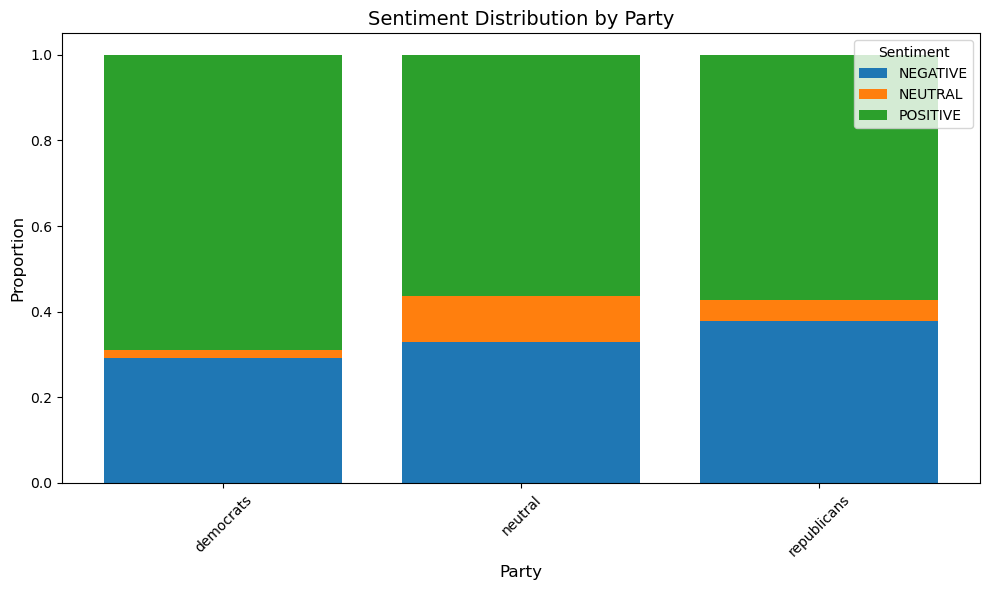

In [110]:
# 設置圖表大小
plt.figure(figsize=(10, 6))

# 獲取情感類型（如 POSITIVE、NEGATIVE、NEUTRAL）
sentiments = primary_party_sentiment.columns

# 堆疊每個政黨的情感比例
for sentiment in sentiments:
    plt.bar(
        primary_party_sentiment.index,
        primary_party_sentiment[sentiment],
        label=sentiment,
        bottom=primary_party_sentiment[sentiments[:sentiments.tolist().index(sentiment)]].sum(axis=1)
        if sentiment != sentiments[0] else None
    )

# 添加圖表標題和軸標籤
plt.title("Sentiment Distribution by Party", fontsize=14)
plt.xlabel("Party", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")

# 顯示圖表
plt.tight_layout()
plt.show()

## Reddit文章標籤(照議題分類)

In [114]:
# 定義關鍵字對應的議題
topics = {
    'Economy': ['economy', 'inflation', 'job', 'market'],
    'Abortion': ['abortion', 'pro-life', 'pro-choice'],
    'Crime': ['crime', 'violence', 'police', 'criminal'],
    'Immigration': ['immigration', 'border', 'migrant'],
    'Climate': ['climate', 'environment', 'carbon', 'greenhouse']
}

# 定義分類函數
def classify_topic(text):
    for topic, keywords in topics.items():
        if any(keyword in text.lower() for keyword in keywords):
            return topic
    return 'Other'  # 未匹配到任何議題時分類為 Other


In [115]:
# 假設 'cleaned_text' 是文本列
data['topic'] = data['cleaned_text'].apply(classify_topic)

# 檢查分類結果
print(data['topic'].value_counts())


topic
Other          985
Economy        119
Crime           58
Immigration     50
Abortion        47
Climate         18
Name: count, dtype: int64


In [117]:
topic_sentiment = data.groupby('topic')['sentiment'].value_counts(normalize=True).unstack()
print("Sentiment distribution by topic:")
print(topic_sentiment)


Sentiment distribution by topic:
sentiment    NEGATIVE   NEUTRAL  POSITIVE
topic                                    
Abortion     0.340426       NaN  0.659574
Climate      0.222222  0.055556  0.722222
Crime        0.689655  0.034483  0.275862
Economy      0.361345  0.016807  0.621849
Immigration  0.480000  0.020000  0.500000
Other        0.323858  0.073096  0.603046


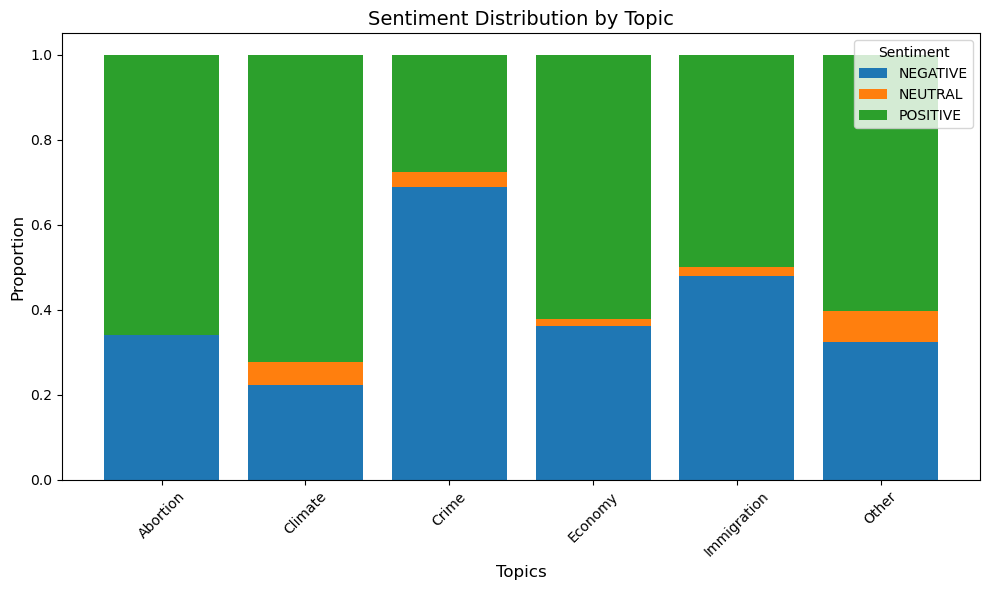

In [118]:
import matplotlib.pyplot as plt

# 設置圖表大小
plt.figure(figsize=(10, 6))

# 獲取情感類型（列名，如 POSITIVE、NEGATIVE、NEUTRAL）
sentiments = topic_sentiment.columns

# 繪製堆疊條形圖
for sentiment in sentiments:
    plt.bar(
        topic_sentiment.index,  # 主題（X 軸）
        topic_sentiment[sentiment],  # 每個情感的比例
        label=sentiment,
        bottom=topic_sentiment[sentiments[:sentiments.tolist().index(sentiment)]].sum(axis=1) if sentiment != sentiments[0] else None
    )

# 添加標題和標籤
plt.title("Sentiment Distribution by Topic", fontsize=14)
plt.xlabel("Topics", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")

# 顯示圖表
plt.tight_layout()
plt.show()


## 使用命名實體識別提取人名

In [121]:
import spacy

# 加載 spaCy 的英文模型
nlp = spacy.load("en_core_web_sm")

# 定義提取主角的函數
def extract_main_entity(text):
    doc = nlp(text)
    people = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    return people if people else ["Unknown"]

# 對數據應用提取
data['main_entity'] = data['cleaned_text'].apply(extract_main_entity)

# 查看結果
print(data[['cleaned_text', 'main_entity']].head())


                                        cleaned_text  \
0  pennsylvania has just been called this was the...   
1  it seems like harris has given up on trying to...   
4  link to his words on it   and heres a link to ...   
5  colorado supreme court rules trump disqualifie...   
6  with lara trump in place by her father rules h...   

                                   main_entity  
0                                 [rick scott]  
1                        [jd vance but harris]  
4  [mcconnell, james lankford, kyrsten sinema]  
5                               [donald trump]  
6                                    [Unknown]  


In [122]:
# 假設已提取出人名
def determine_main_character(text):
    entity_count = {}
    for person in text:
        entity_count[person] = entity_count.get(person, 0) + 1
    return max(entity_count, key=entity_count.get) if entity_count else "Unknown"

# 提取主要人物
data['primary_character'] = data['main_entity'].apply(determine_main_character)

# 查看結果
print(data[['cleaned_text', 'primary_character']].head())


                                        cleaned_text    primary_character
0  pennsylvania has just been called this was the...           rick scott
1  it seems like harris has given up on trying to...  jd vance but harris
4  link to his words on it   and heres a link to ...            mcconnell
5  colorado supreme court rules trump disqualifie...         donald trump
6  with lara trump in place by her father rules h...              Unknown


In [130]:
# 定義基於主體的情感分析函數
def analyze_sentiment_by_character(row):
    text = row['cleaned_text']  # 文本內容
    sentiment = analyzer.polarity_scores(text)  # 計算情感得分
    
    # 判斷情感標籤
    if sentiment['compound'] >= 0.05:
        return 'POSITIVE'
    elif sentiment['compound'] <= -0.05:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# 對每篇文章添加情感分析結果
data['character_sentiment'] = data.apply(analyze_sentiment_by_character, axis=1)

# 查看結果
print(data[['primary_character', 'character_sentiment']].head())

  primary_character character_sentiment
0      Donald Trump            POSITIVE
1      Donald Trump            POSITIVE
4      Donald Trump            NEGATIVE
5      Donald Trump            POSITIVE
6      Donald Trump            POSITIVE


In [124]:
# 按主體和情感分組，計算比例
character_sentiment_distribution = data.groupby('primary_character')['character_sentiment'].value_counts(normalize=True).unstack()

# 打印結果
print("情感分布按主體匯總:")
print(character_sentiment_distribution)


情感分布按主體匯總:
character_sentiment  NEGATIVE   NEUTRAL  POSITIVE
primary_character                                
Unknown              0.355795  0.071429  0.572776
abbott               1.000000       NaN       NaN
adolph hitler             NaN       NaN  1.000000
alexander hamilton        NaN       NaN  1.000000
american third            NaN       NaN  1.000000
...                       ...       ...       ...
wi                   1.000000       NaN       NaN
william lewis             NaN       NaN  1.000000
william reesmogg          NaN       NaN  1.000000
wolf                 1.000000       NaN       NaN
yahya sinwar         1.000000       NaN       NaN

[244 rows x 3 columns]


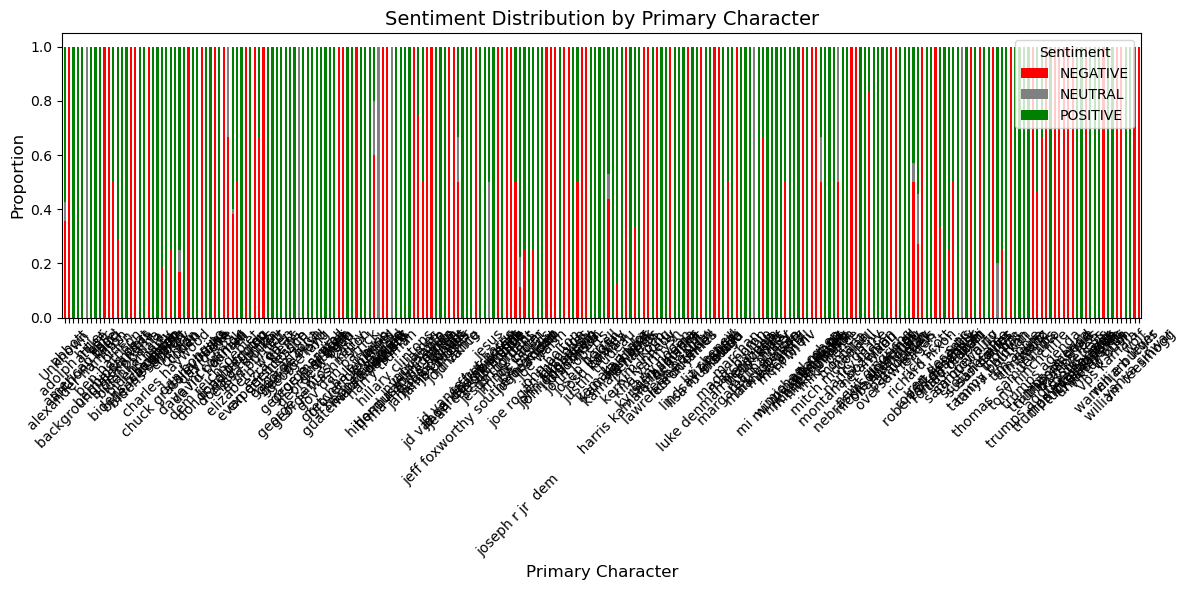

In [125]:
import matplotlib.pyplot as plt

# 繪製堆疊條形圖
character_sentiment_distribution.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=['red', 'gray', 'green']
)

# 添加標題和標籤
plt.title("Sentiment Distribution by Primary Character", fontsize=14)
plt.xlabel("Primary Character", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


## 用名字關鍵字來幫文章分類

In [126]:
# 定義簡稱和全名的對應關係
character_map = {
    'trump': 'Donald Trump',
    'trumps': 'Donald Trump',
    'biden': 'Joe Biden',
    'joe': 'Joe Biden',
    'kamala': 'Kamala Harris',
    'harris': 'Kamala Harris'  # 如果還有其他簡稱可以補充
}

# 定義基於名字（包括簡稱）的分類函數
def classify_by_character(text):
    for key, full_name in character_map.items():
        if key in text.lower():
            return full_name  # 返回對應的全名
    return 'Unknown'  # 如果不包含任何已知角色，返回 Unknown

# 將文章分類到主要角色
data['primary_character'] = data['cleaned_text'].apply(classify_by_character)

# 檢查結果
print(data[['cleaned_text', 'primary_character']].head())

                                        cleaned_text primary_character
0  pennsylvania has just been called this was the...      Donald Trump
1  it seems like harris has given up on trying to...      Donald Trump
4  link to his words on it   and heres a link to ...      Donald Trump
5  colorado supreme court rules trump disqualifie...      Donald Trump
6  with lara trump in place by her father rules h...      Donald Trump


In [127]:
character_counts = data['primary_character'].value_counts()

# 打印結果
print("每個角色的文章數量：")
print(character_counts)


每個角色的文章數量：
primary_character
Donald Trump     751
Unknown          364
Joe Biden        110
Kamala Harris     52
Name: count, dtype: int64


In [131]:
# 添加情感分析結果
data['sentiment'] = data['cleaned_text'].apply(analyze_sentiment_vader)

# 查看結果
print(data[['primary_character', 'sentiment']].head())

  primary_character sentiment
0      Donald Trump  POSITIVE
1      Donald Trump  POSITIVE
4      Donald Trump  NEGATIVE
5      Donald Trump  POSITIVE
6      Donald Trump  POSITIVE


In [132]:
character_sentiment_distribution = data.groupby('primary_character')['sentiment'].value_counts(normalize=True).unstack()

# 打印結果
print("角色的情感分布：")
print(character_sentiment_distribution)


角色的情感分布：
sentiment          NEGATIVE   NEUTRAL  POSITIVE
primary_character                              
Donald Trump       0.375499  0.051931  0.572570
Joe Biden          0.290909  0.027273  0.681818
Kamala Harris      0.307692  0.057692  0.634615
Unknown            0.318681  0.090659  0.590659


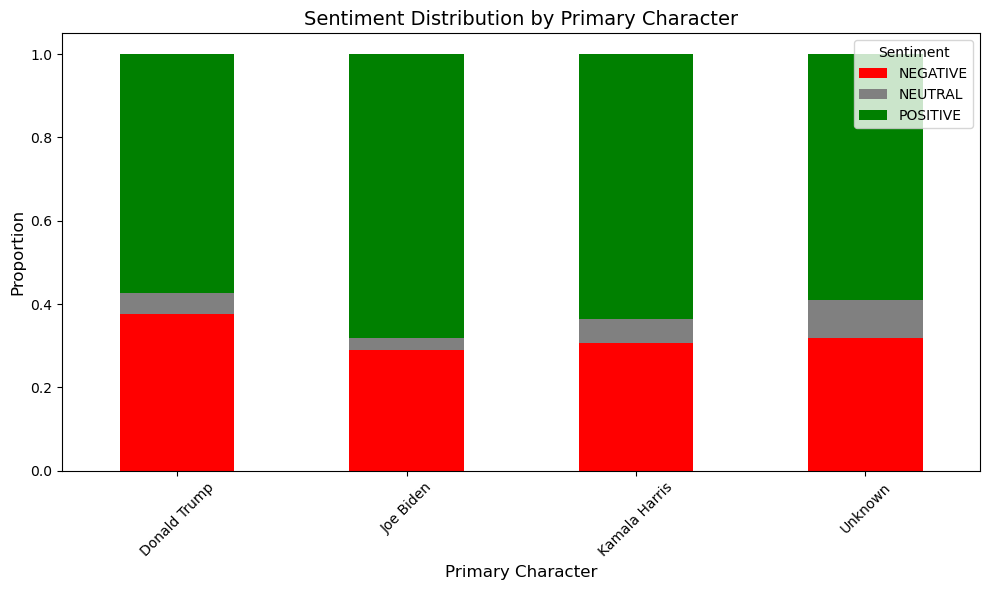

In [133]:
import matplotlib.pyplot as plt

# 繪製堆疊條形圖
character_sentiment_distribution.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6),
    color=['red', 'gray', 'green']
)

# 添加標題和標籤
plt.title("Sentiment Distribution by Primary Character", fontsize=14)
plt.xlabel("Primary Character", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


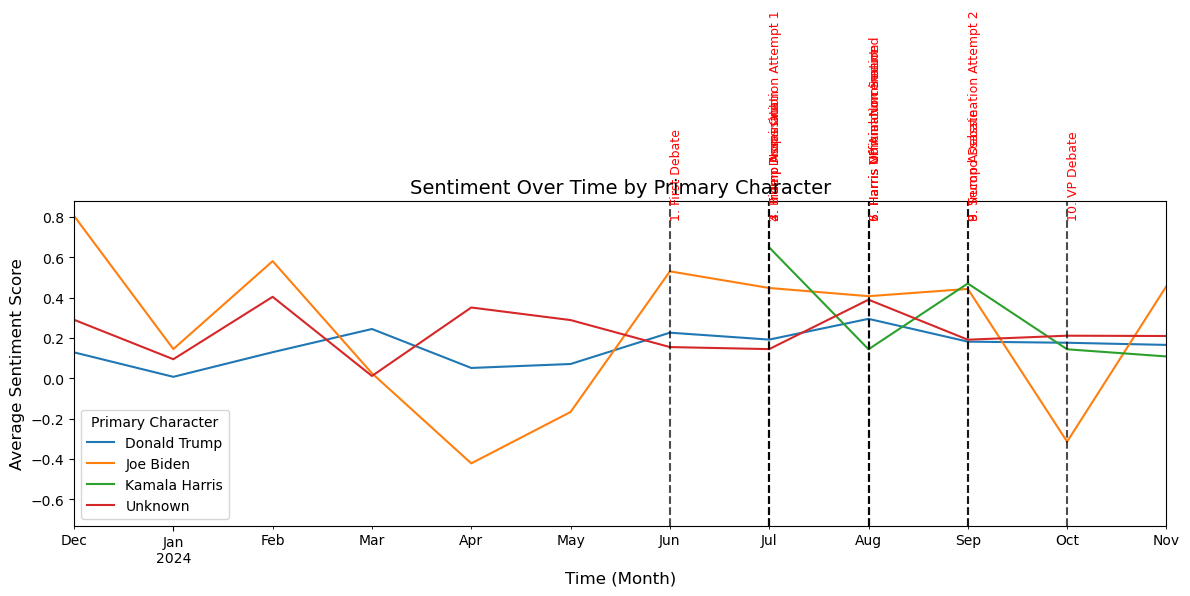

In [143]:
# 刪除無效日期的行
data = data[pd.to_datetime(data['created_at'], errors='coerce').notna()]

# 重新轉換日期
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')

# 假設有 created_at 列（已轉換為 datetime 格式）
data['created_at'] = pd.to_datetime(data['created_at'])

# 按角色和時間分組計算平均情感分數
data['sentiment_score'] = data['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
time_series = data.groupby([data['created_at'].dt.to_period('M'), 'primary_character'])['sentiment_score'].mean().unstack()

# 可視化
time_series.plot(figsize=(12, 6))

# 標記事件
for event_name, event_date in events.items():
    event_date = pd.to_datetime(event_date)
    plt.axvline(event_date, color='black', linestyle='--', alpha=0.7)  # 添加垂直線
    plt.text(event_date, 0.8, event_name, rotation=90, fontsize=9, color='red')  # 添加事件標籤

plt.title("Sentiment Over Time by Primary Character", fontsize=14)
plt.xlabel("Time (Month)", fontsize=12)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.legend(title="Primary Character")
plt.tight_layout()
plt.show()


In [141]:
# 提取角色列表
characters = list(set(character_map.values()))
print("定義的角色列表：", characters)

# 按角色分組提取高頻詞
for character in characters:
    character_text = data[data['primary_character'] == character]['cleaned_text']
    stop_words = set(stopwords.words('english'))
    custom_stop_words = [ 'trump', 'biden', 'election', 'like', 'people', 
        'harris', 'think', 'vote', 'just', 'president',
        'party', 'states', 'im', 'republicans', 
        'dont', 'voters', 'democrats', 'know', 'candidate', 'goodbye', 'everyone',
        'does', 'going', 'trumps', 'would' ,'could', 'one', 'even', 'us', 
        'get', 'time', 'many', 'win', 'campaign',  
        'much', 'also', 'still', 'since', 'political', 'polls', 
        'years', 'senate', 'debate', 'said', 'see', 
        'right', 'likely', 'go', 'kamala', 'new', 'make']
    stop_words.update(custom_stop_words)  # 合併停用詞
    stop_words_list = list(stop_words)
    vectorizer = CountVectorizer(stop_words=stop_words_list, max_features=10)
    word_counts = vectorizer.fit_transform(character_text)
    print(f"Top words for {character}:")
    print(vectorizer.get_feature_names_out())


定義的角色列表： ['Joe Biden', 'Kamala Harris', 'Donald Trump']
Top words for Joe Biden:
['back' 'bidens' 'country' 'court' 'democratic' 'first' 'help' 'israel'
 'state' 'term']
Top words for Kamala Harris:
['canvassing' 'district' 'gov' 'including' 'race' 'running' 'state'
 'swing' 'vp' 'walz']
Top words for Donald Trump:
['court' 'democratic' 'donald' 'first' 'point' 'presidential' 'republican'
 'say' 'state' 'support']
